In [0]:
## Installing Additional Libraries
pip install pycaret
pip install pyforest

In [0]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
% matplotlib inline

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# for tree binarisation
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


# to build the models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

# to evaluate the models
from sklearn.metrics import mean_squared_error

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [0]:
# to know the number of implict imports active in case pyforest is used.
active_imports()

In [0]:
# loading the dataset
df=pd.read_csv('/content/sample_data/stock_data.csv')

# viewing the loaded dataset
df.head()

In [0]:
# to see the information about data and shape of loaded dataset
df.info()
df.shape

# to know the datatypes of the data
df.dtypes

## Checking if there is any missing values in the dataset. 
df.isnull().sum()

In [0]:
train_x = df.drop(columns=['Y'],axis=1)
train_y = df['Y']

In [0]:
# to get a glimpse of the dataset
train_x.describe()

In [0]:
# to scale the data
train_x = StandardScaler().fit_transform(train_x) 

In [0]:
train_x.head()
train_y.head()

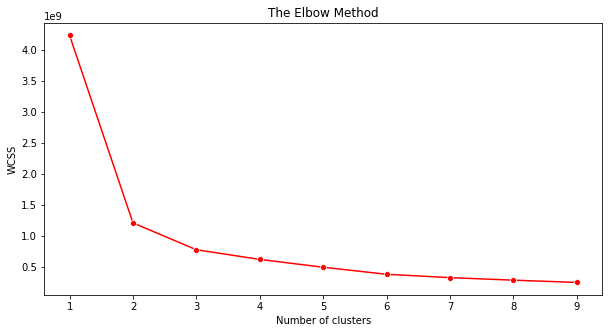

In [77]:
## Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
import seaborn as sns
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(train_x)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

## Plotting the elbow method
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 10), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [78]:
## Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3 , random_state = 42)
kmeans.fit(train_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [0]:
### Clustering Resutls

identified_clusters = kmeans.fit_predict(train_x)

In [0]:
data_with_clusters = train_x.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters